In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
wine=load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
X=pd.DataFrame(wine.data,columns=wine.feature_names)
Y=pd.DataFrame(wine.target,columns=['target'])
data=pd.concat([X,Y], axis =1)

In [4]:
data1=data.corr('pearson')
data1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [5]:
abs(data1.loc['target']).sort_values(ascending=False)

target                          1.000000
flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
color_intensity                 0.265668
magnesium                       0.209179
ash                             0.049643
Name: target, dtype: float64

In [6]:
data=(data-data.mean())/(data.max()-data.min())
X=np.array(data.iloc[:,:-1])
Y=np.array(data.iloc[:,-1])
Y=Y.reshape(len(Y),1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
print(np.shape(xtrain))
print(np.shape(ytrain))
xtrain

(142, 13)
(142, 1)


array([[ 0.36299527, -0.0921637 ,  0.00721024, ...,  0.19719558,
         0.14223978,  0.57068954],
       [ 0.02089001,  0.30902207, -0.00348495, ..., -0.31499954,
        -0.46948183, -0.14043742],
       [ 0.20510053,  0.08372563, -0.03557051, ..., -0.20930849,
        -0.3412767 , -0.09407508],
       ...,
       [ 0.04194264,  0.24380468, -0.11578441, ..., -0.2906093 ,
        -0.3412767 ,  0.05927728],
       [ 0.11825843,  0.26949638,  0.1248573 , ..., -0.08735727,
        -0.38523274, -0.03701374],
       [ 0.0840479 ,  0.17858729,  0.00721024, ..., -0.33125971,
        -0.36325472, -0.06911074]])

In [7]:
def sigmoid(x):
  return (1)/(1+np.exp(-x))
  
def dsigmoid(x):
  return x*(1-x)

def relu(x):
  return abs(x) * (x>0)

def drelu(x):
  return 1. * (x>0)

def lrelu(x):
  return np.where(x > 0., x, x*0.01)

def dlrelu(x):
  dx=np.ones_like(x)
  dx[x < 0.]=0.01
  return dx


def tanh(x):
  return np.tanh(x)

def dtanh(x):
  return 1.0 - (np.power(np.tanh(x),2))

In [8]:
def feed_forward(data_in,w0,w1,w2,w3,b):
  layer0=data_in
  layer1=relu(np.dot(layer0,w0))
  layer2=relu(np.dot(layer1,w1))
  layer3=relu(np.dot(layer2,w2))
  layer4=np.dot(layer3,w3)+b
  
  return layer0,layer1,layer2,layer3,layer4

In [9]:
def back_propogation(i,layer0,layer1,layer2,layer3,layer4,actual_y,w0,w1,w2,w3,b,learning_rate):
  op_delta=layer4 - actual_y
  dh4= np.dot(layer3.T,op_delta)

  l3_error = op_delta.dot(w3.T)
  l3_delta = l3_error * drelu(layer3)
  dh3=np.dot(layer2.T,l3_delta)

  l2_error = l3_delta.dot(w2.T)
  l2_delta = l2_error * drelu(layer2)
  dh2=np.dot(layer1.T,l2_delta)

  l1_error = l2_delta.dot(w1.T)
  l1_delta = l1_error * drelu(layer1)
  dh1=np.dot(layer0.T,l1_delta)
  
  w3=w3-(learning_rate*dh4)
  w2=w2-(learning_rate*dh3)
  w1=w1-(learning_rate*dh2)
  w0=w0-(learning_rate*dh1)

  b=b-(learning_rate*np.mean(op_delta))

  if i%50==0 and (i!=0):
    loss=np.mean(np.power(layer4-actual_y,2))
    loss_curve.append(loss)
    iters.append(int(i))

    if(i%1000==0):
      print("\n",int(i),loss)
  return w0,w1,w2,w3,b

In [10]:
w0=np.random.random((13,65))
w1=np.random.random((65,39))
w2=np.random.random((39,7))
w3=np.random.random((7,1))

b=np.random.random((1,1))
epochs=10000

In [11]:
loss_curve= []
iters= []

In [12]:
for i in tqdm_notebook(range(epochs)):
  layer0,layer1,layer2,layer3,layer4= feed_forward(xtrain,w0,w1,w2,w3,b)
  w0,w1,w2,w3,b = back_propogation(i, layer0, layer1, layer2, layer3, layer4, ytrain, w0, w1, w2, w3, b, 0.001)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.



 1000 0.15235151797139948

 2000 0.151493065008882

 3000 0.15137700223239237

 4000 0.15136131055366953

 5000 0.15135918903987686

 6000 0.15135890221137036

 7000 0.15135886343217764

 8000 0.1513588581892337

 9000 0.15135885748038808



In [13]:
layer0, layer1, layer2, layer3, layer4 = feed_forward(xtest, w0, w1, w2, w3, b)
loss=np.mean(np.power(layer4-ytest,2))
loss

0.14412327647112108

In [14]:
Accuracy=(1-loss)*100
Accuracy

85.58767235288789

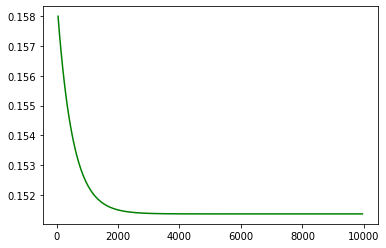

In [15]:
plt.plot(iters,loss_curve,'g')